In [ ]:
#1 Read the bike details dataset into a Pandas DataFrame and display its first 10 rows.

import pandas as pd
df=pd.read_csv("BIKE DETAILS.csv")
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [ ]:
#2 Check for the missing values in all the columns and describe your approach for handling them.

import pandas as pd
df=pd.read_csv("BIKE DETAILS.csv")

missing_values=df.isnull().sum()
print(missing_values)




name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


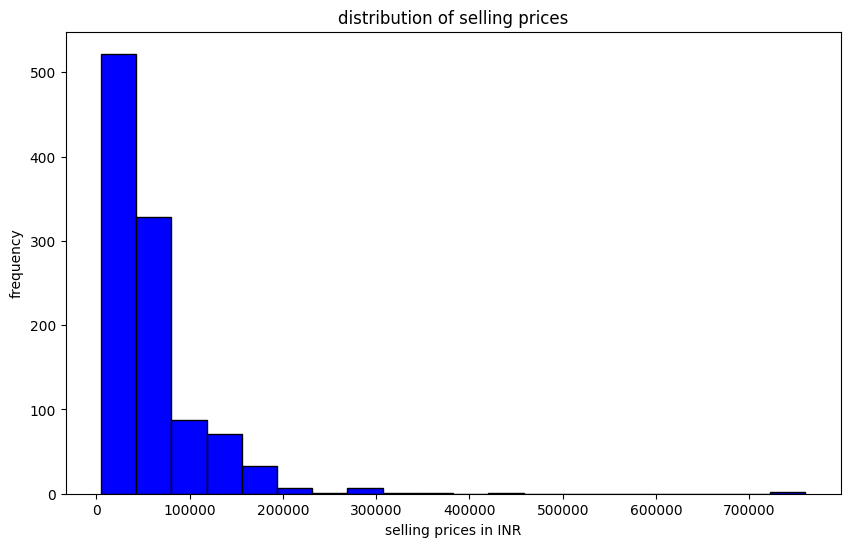

In [ ]:
#3 Plot the ditribution of selling prices using a histogram and describe the overall trend.

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("BIKE DETAILS.csv")
plt.figure(figsize=(10,6))
plt.hist(df["selling_price"],bins=20, color="blue",edgecolor="black")
plt.xlabel("selling prices in INR")
plt.ylabel("frequency")
plt.title("distribution of selling prices")
plt.show()

#insights: Maximum number of bikes sold in the selling price range under 100000 INR.

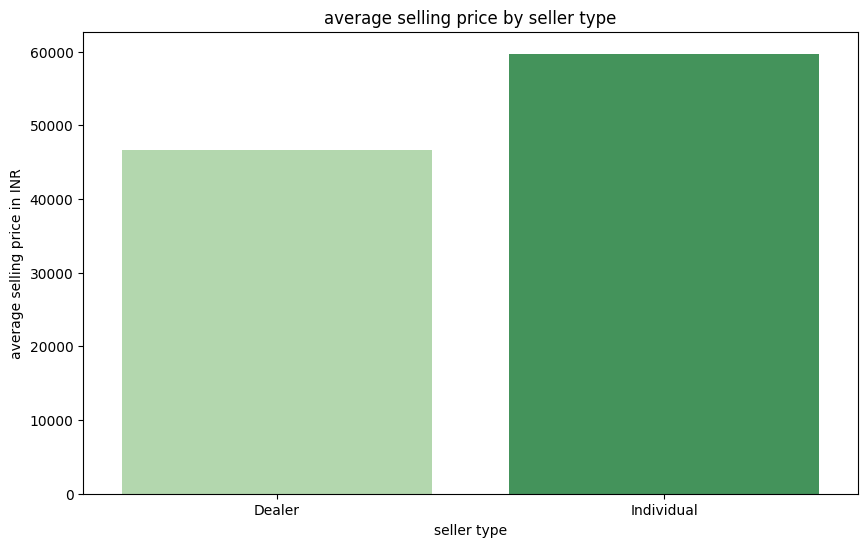

In [ ]:
#4 Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("BIKE DETAILS.csv")
average_selling_price=df.groupby("seller_type")["selling_price"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="seller_type",y="selling_price", data=average_selling_price, palette="Greens")
plt.title("average selling price by seller type")
plt.xlabel("seller type")
plt.ylabel("average selling price in INR")
plt.show()

#insights: Based on barplot , it appears that the average selling price varies across different seller type.

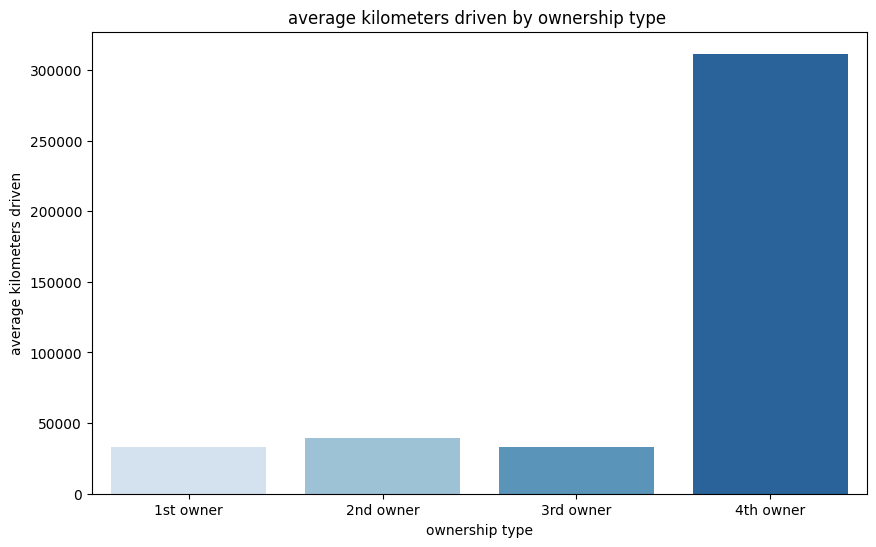

In [ ]:
#5 Compute the average km_driven for each ownership type and present the result as bar plot.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("BIKE DETAILS.csv")
average_km_by_owner =df.groupby("owner")["km_driven"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="owner",y="km_driven", data=average_km_by_owner, palette="Blues")
plt.title("average kilometers driven by ownership type ")
plt.xlabel("ownership type")
plt.ylabel("average kilometers driven")
plt.show()

In [ ]:
#6 Use the IQR method to detect and remove outliers from the km_driven column. Show before and after summary statistics.

import pandas as pd

df=pd.read_csv("BIKE DETAILS.csv")
print(" summary statistics before removal of outliers :")
print(df["km_driven"].describe())

Q1=df["km_driven"].quantile(0.25)
Q3=df["km_driven"].quantile(0.75)
IQR=Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=df[(df["km_driven"]< lower_bound) | (df["km_driven"] > upper_bound)]
print("\nOutliers:")
print(outliers[["name","km_driven"]])

df_no_outliers= df[(df["km_driven"] >= lower_bound) & (df["km_driven"]<= upper_bound)]

print(" summary statistics after removal of outliers :")
print(df_no_outliers["km_driven"].describe())



 summary statistics before removal of outliers :
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Outliers:
                                 name  km_driven
91           Honda Activa [2000-2015]     500000
93                      Suzuki GS150R     130000
115           Hero Honda Passion Plus     120000
135            Hero Honda CBZ extreme      90000
154                Hero Xtreme Sports      99000
184              Honda CB Unicorn 160     100000
363                Hero Honda CD100SS     646000
470          Honda Activa [2000-2015]      95000
474     Hero Honda Passion PRO [2012]      90000
477          Honda Activa [2000-2015]     585659
511                Hero Splendor Plus     100000
535              Hero Honda CD Deluxe     100000
548                         Bajaj Xcd     100000
575                Hero Honda Karizma 

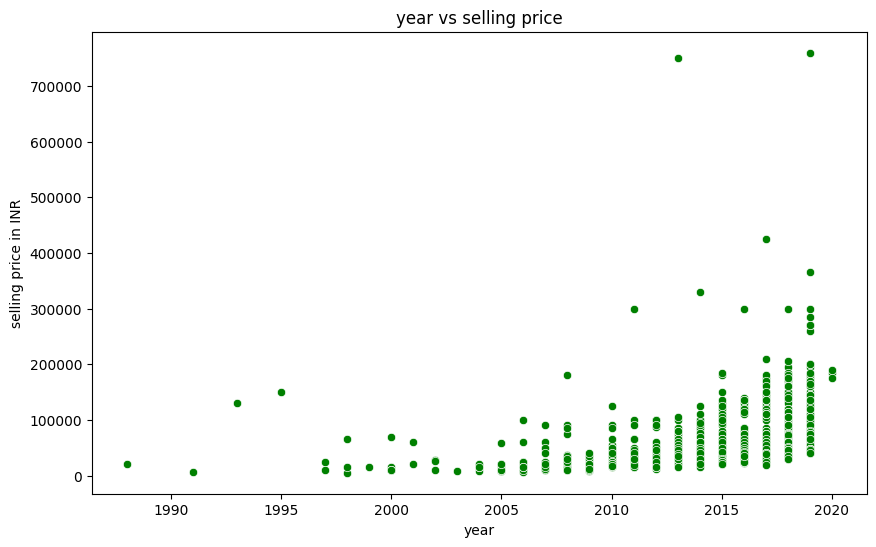

In [ ]:
#7 Create a scatter plot of year vs selling_price to explore the relationship  between a bike's age and its price.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(10,6))
sns.scatterplot(x="year", y="selling_price", data=df, color="green")
plt.title("year vs selling price")
plt.xlabel("year")
plt.ylabel("selling price in INR")
plt.show()

In [ ]:
#8 Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df=pd.read_csv("BIKE DETAILS.csv")
df1=pd.get_dummies(df,columns=["seller_type"])
print(df1.head(5))



                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


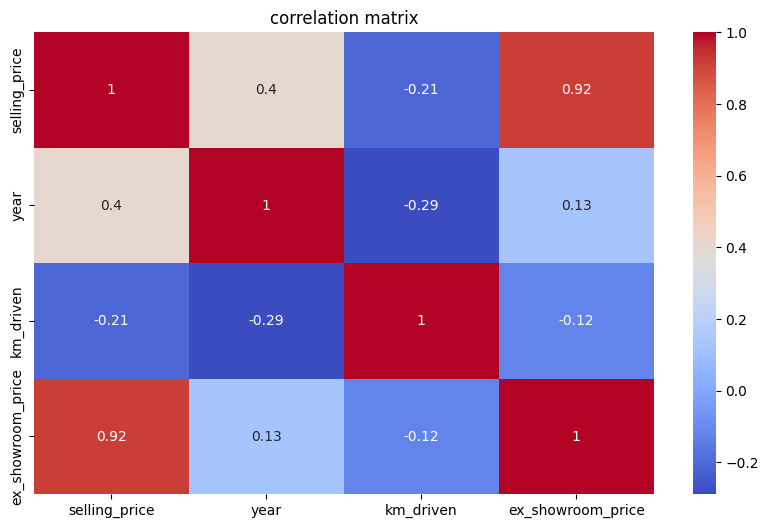

In [3]:
#9 Generate a heatmap of correlation matrix for all numeric columns. What correlations stand out the most ?



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("BIKE DETAILS.csv")
numeric_cols= df.select_dtypes(include=['number'])



plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(),  cmap='coolwarm', annot=True)
plt.title("correlation matrix")
plt.show()

# Observe heatmap to identify strong positive or negative correlations between the variables.

#10) Summarize your findings in a brief report:
      - What are the most important factors affecting a bike's selling price ?
      - Mention any data cleaning or feature engineering you performed.
  - Report on Bike's selling Analysis:
  1. Important factors affecting selling price-
        -Year of Manufacture: Newer bikes command higher prices; older bikes depreciate quickly.
       - Ownership Type: First-owner bikes generally sell at higher prices    compared to second / third - owner bikes.
        -Kilometers Driven: Bikes with lower mileage tends to fetch higher prices.
       - Seller Type: Dealers( especially certified/Trustmark dealers) usually list bikes at higher prices compared to individuals.

  2. Data Cleaning Performed:
        - Missing values: Checked for missing values and imputed/dropped them where necessary.
        -Outlier removal: Used IQR method to remove unrealistic value in km_driven.
        - Feature Engineering step: Onehotencoding was performed on the seller_type to convert it to numerical format suitable for potential modelling.